C:\Users\Pc\miniconda3\envs\ciencia_de_datos\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Pc\miniconda3\envs\ciencia_de_datos\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Pc\miniconda3\envs\ciencia_de_datos\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Pc\miniconda3\envs\ciencia_de_datos\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\Pc\miniconda3\envs\ciencia_de_datos\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Precisión promedio del modelo GLM Binomial (K-Folds): 0.73
AUC promedio del modelo GLM Binomial (K-Folds): 0.65


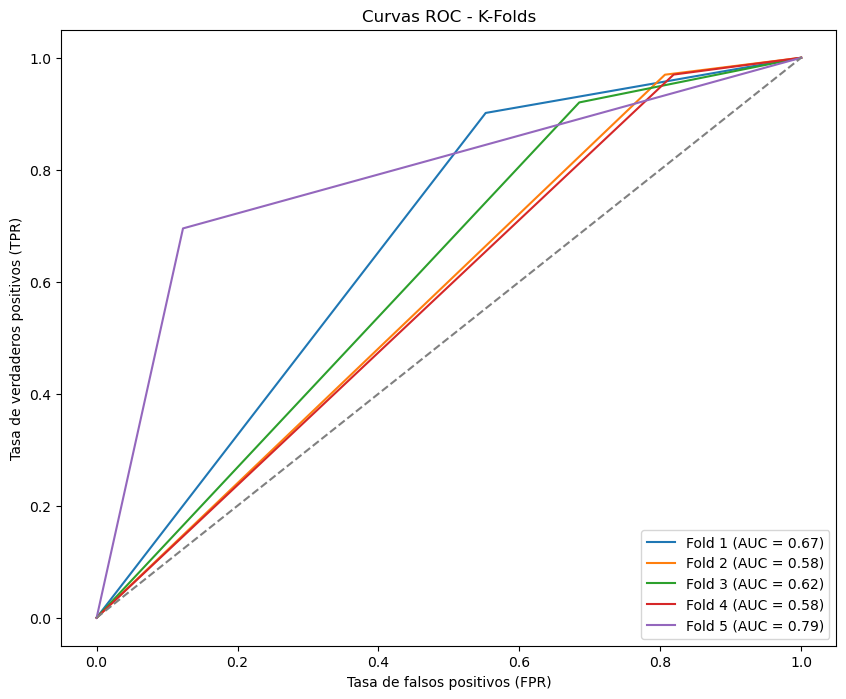

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Cargar el dataset
SUPPPORT2 = pd.read_excel("SUPPPORT2.xlsx")

# Definir las variables dependientes e independientes
Y = SUPPPORT2.loc[:, 'death'].to_numpy()
X = SUPPPORT2.drop(columns=['hospdead', 'death'])

# Crear variables dummy para las columnas categóricas
X = pd.get_dummies(X, columns=['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'sfdm2'], dummy_na=True)

# Imputar los valores faltantes usando KNN
knn_imputer = KNNImputer(n_neighbors=5)
X_imputed = knn_imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Identificar los índices de los NaN en Y
na_indices = np.where(np.isnan(Y))[0]

# Limpiar los datos eliminando los NaN en Y
X_cleaned = X_imputed.drop(index=na_indices)
Y_cleaned = Y[~np.isnan(Y)]

# Escalar las características usando MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# ----------------- K-Fold Cross Validation -----------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicialización de variables para almacenar resultados
accuracies = []
roc_auc_scores = []

# Inicializar la figura para las curvas ROC
plt.figure(figsize=(10, 8))

# Realizar K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo GLM con familia binomial
    X_train_scaled_sm = sm.add_constant(X_train)
    X_test_scaled_sm = sm.add_constant(X_test)

    # Ajustar el modelo GLM
    glm_binom = sm.GLM(y_train, X_train_scaled_sm, family=sm.families.Binomial())
    res = glm_binom.fit()

    # Realizar predicciones sobre el conjunto de prueba
    y_pred_prob_glm = res.predict(X_test_scaled_sm)
    y_pred_glm = (y_pred_prob_glm > 0.5).astype(int)  # Clasificar como 1 si la probabilidad es mayor que 0.5

    # Evaluación: Precisión
    accuracy = metrics.accuracy_score(y_test, y_pred_glm)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob_glm)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# ----------------- Promedio de precisión -----------------
avg_accuracy = np.mean(accuracies)
avg_roc_auc = np.mean(roc_auc_scores)

# Mostrar precisión promedio y AUC promedio
print(f"Precisión promedio del modelo GLM Binomial (K-Folds): {avg_accuracy:.2f}")
print(f"AUC promedio del modelo GLM Binomial (K-Folds): {avg_roc_auc:.2f}")

# ----------------- Mostrar curva ROC promedio -----------------
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (no discriminación)
plt.title('Curvas ROC - K-Folds')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend(loc='lower right')
plt.show()



C:\Users\Pc\miniconda3\envs\ciencia_de_datos\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pc\miniconda3\envs\ciencia_de_datos\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

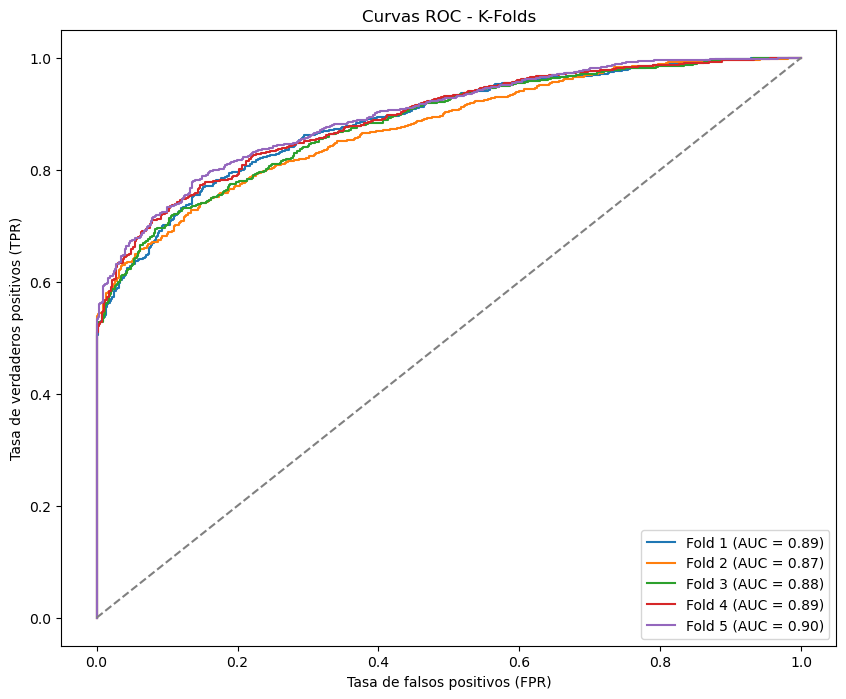

AUC promedio de las curvas ROC (K-Folds): 0.89
Precisión promedio del modelo (K-Folds): 0.80


In [4]:
from sklearn.linear_model import LogisticRegression 
# ----------------- K-Fold Cross Validation -----------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicialización de variables para almacenar resultados
accuracies = []
roc_auc_scores = []

# Inicializar la figura para las curvas ROC
plt.figure(figsize=(10, 8))

# Realizar K-Fold Cross Validation
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo de regresión logística
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = log_model.predict(X_test)
    y_pred_prob = log_model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Calcular y almacenar la precisión del modelo
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# ----------------- Promedio de precisión -----------------
avg_accuracy = np.mean(accuracies)


# ----------------- Mostrar curva ROC promedio -----------------
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (no discriminación)
plt.title('Curvas ROC - K-Folds')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

# Mostrar el AUC promedio
avg_roc_auc = np.mean(roc_auc_scores)
print(f"AUC promedio de las curvas ROC (K-Folds): {avg_roc_auc:.2f}")
print(f"Precisión promedio del modelo (K-Folds): {avg_accuracy:.2f}")

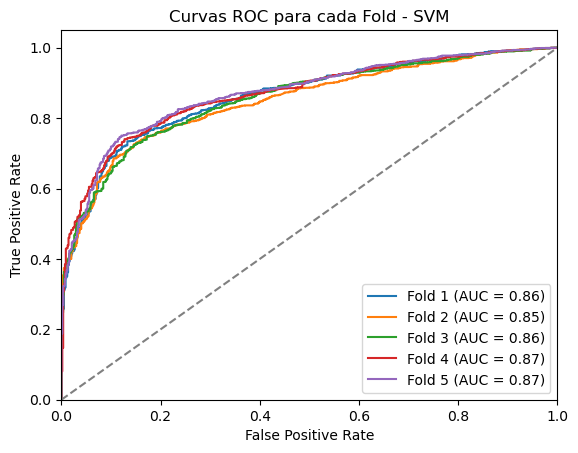

Precisión promedio: 0.77
AUC promedio: 0.86


In [5]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que tienes X_scaled y Y_cleaned como tus datos de entrada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar las métricas de precisión y AUC
accuracies = []
roc_auc_scores = []

# Realizar validación cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo SVM (RBF kernel en este caso)
    svm_model = SVC(kernel='rbf', gamma=0.5, C=0.1, probability=True)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = svm_model.predict(X_test)
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Calcular y almacenar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# Mostrar la gráfica de todas las curvas ROC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para cada Fold - SVM')
plt.legend(loc="lower right")
plt.show()

# Calcular y mostrar la precisión promedio y el AUC promedio
avg_accuracy = np.mean(accuracies)
avg_roc_auc = np.mean(roc_auc_scores)
print(f'Precisión promedio: {avg_accuracy:.2f}')
print(f'AUC promedio: {avg_roc_auc:.2f}')


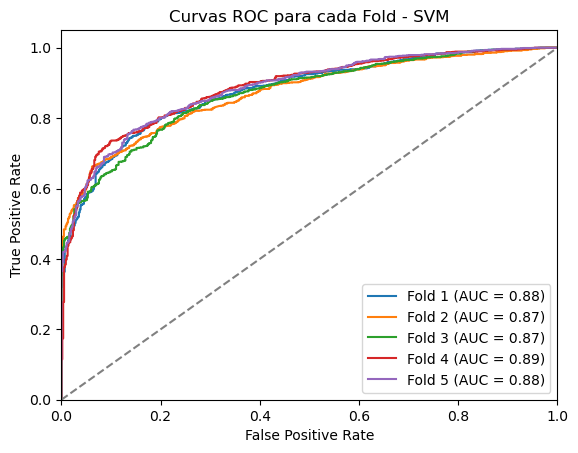

Precisión promedio: 0.80
AUC promedio: 0.88


In [6]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que tienes X_scaled y Y_cleaned como tus datos de entrada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar las métricas de precisión y AUC
accuracies = []
roc_auc_scores = []

# Realizar validación cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y_cleaned[train_index], Y_cleaned[test_index]

    # Crear el modelo SVM (RBF kernel en este caso)
    svm_model = SVC(kernel='poly', degree=3, C=1, probability=True)
    svm_model.fit(X_train, y_train)

    # Hacer predicciones sobre el conjunto de prueba
    y_pred = svm_model.predict(X_test)
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Calcular y almacenar la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Evaluación: Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Graficar la curva ROC para cada pliegue
    plt.plot(fpr, tpr, label=f'Fold {fold + 1} (AUC = {roc_auc:.2f})')

# Mostrar la gráfica de todas las curvas ROC
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para cada Fold - SVM')
plt.legend(loc="lower right")
plt.show()

# Calcular y mostrar la precisión promedio y el AUC promedio
avg_accuracy = np.mean(accuracies)
avg_roc_auc = np.mean(roc_auc_scores)
print(f'Precisión promedio: {avg_accuracy:.2f}')
print(f'AUC promedio: {avg_roc_auc:.2f}')
